In [1]:
from models import MultiClassSegmentationModel
import torch
import numpy as np

/home/ebneto/miniconda3/envs/pl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
model = torch.load('./mlruns/742274576685060379/c036ad750498412384b4f7bffe974002/artifacts/model/data/model.pth').to('cuda')
model.loss

CrossEntropyLoss()

In [17]:
image = np.load('data/scenes_allbands_ndvi/allbands_ndvi_x01.npy')

In [20]:
image = image[:image.shape[0]//16 * 16, :image.shape[1]//16 * 16, :]
image = np.transpose(image, (2, 0, 1))
image.shape

(8, 832, 1216)

In [25]:
image = torch.tensor(image, device='cuda').unsqueeze(0)
model = model.eval()
with torch.no_grad():
    pred = model(image)
pred = pred.detach().cpu().numpy()
pred = pred.squeeze(0)
pred = np.argmax(pred, axis=0)

/tmp/ipykernel_9097/2361922736.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, device='cuda').unsqueeze(0)


[2 3]


Text(0.5, 1.0, 'x01 | Cross Entropy | All+NDVI')

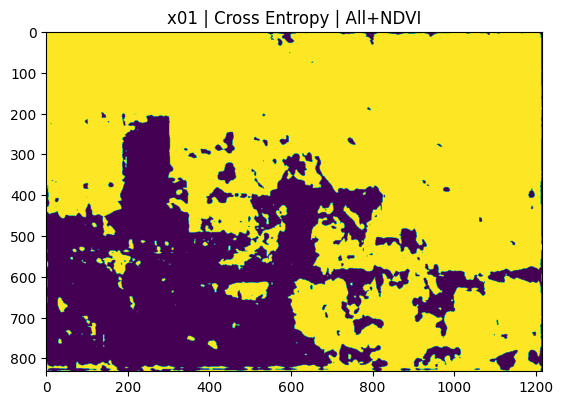

In [35]:
import matplotlib.pyplot as plt
print(np.unique(pred))
plt.imshow(pred)
plt.title('x01 | Cross Entropy | All+NDVI')

In [40]:
model = torch.load('./mlruns/742274576685060379/438cd59a1813409dbca70da31f493e09/artifacts/model/data/model.pth').to('cuda')
model.loss

CrossEntropyLoss()

In [38]:
image = np.load('data/scenes_allbands_ndvi/allbands_ndvi_x01.npy')
image = image[:image.shape[0]//16 * 16, :image.shape[1]//16 * 16, [3, 2, 0, 5]]
image = np.transpose(image, (2, 0, 1))
image = torch.tensor(image, device='cuda').unsqueeze(0)
model = model.eval()
with torch.no_grad():
    pred = model(image)
pred = pred.detach().cpu().numpy()
pred = pred.squeeze(0)
pred = np.argmax(pred, axis=0)

[1 2 3]


Text(0.5, 1.0, 'x01 | Cross Entropy | 4316')

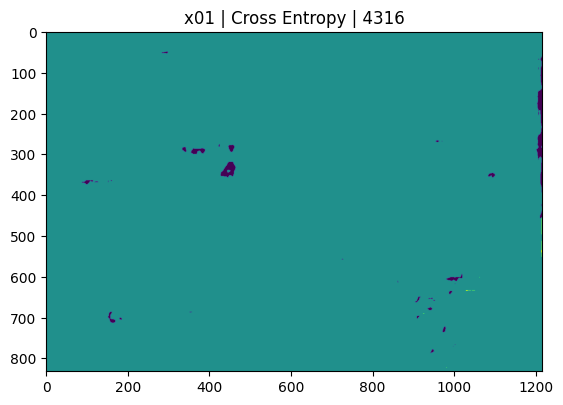

In [39]:
import matplotlib.pyplot as plt
print(np.unique(pred))
plt.imshow(pred)
plt.title('x01 | Cross Entropy | 4316')

In [45]:
model = torch.load('./mlruns/742274576685060379/a9d4170165ef46899ec405b7086d782a/artifacts/model/data/model.pth').to('cuda')
model.loss

FocalLoss()

In [46]:
image = np.load('data/scenes_allbands_ndvi/allbands_ndvi_x01.npy')
image = image[:image.shape[0]//16 * 16, :image.shape[1]//16 * 16, [3, 2, 0, 5]]
image = np.transpose(image, (2, 0, 1))
image = torch.tensor(image, device='cuda').unsqueeze(0)
model = model.eval()
with torch.no_grad():
    pred = model(image)
pred = pred.detach().cpu().numpy()
pred = pred.squeeze(0)
pred = np.argmax(pred, axis=0)

[0 2 3]


Text(0.5, 1.0, 'x01 | FocalLoss | 4316')

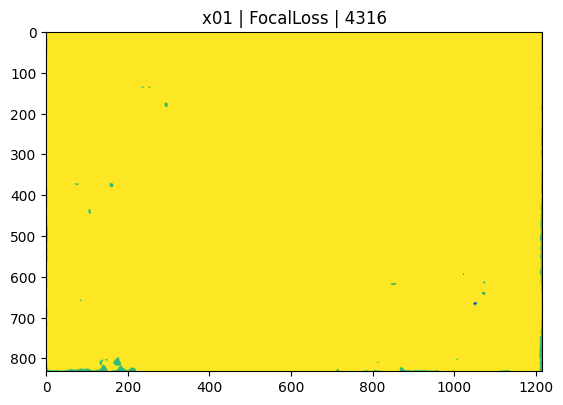

In [47]:
print(np.unique(pred))
plt.imshow(pred)
plt.title('x01 | FocalLoss | 4316')

In [48]:
model = torch.load('./mlruns/742274576685060379/074e2388cf0149e780033d20e346c363/artifacts/model/data/model.pth').to('cuda')
model.loss

FocalLoss()

In [50]:
image = np.load('data/scenes_allbands_ndvi/allbands_ndvi_x01.npy')
image = image[:image.shape[0]//16 * 16, :image.shape[1]//16 * 16, :]
image = np.transpose(image, (2, 0, 1))
image = torch.tensor(image, device='cuda').unsqueeze(0)
model = model.eval()
with torch.no_grad():
    pred = model(image)
pred = pred.detach().cpu().numpy()
pred = pred.squeeze(0)
pred = np.argmax(pred, axis=0)

[1 2 3]


Text(0.5, 1.0, 'x01 | FocalLoss | All+NDVI')

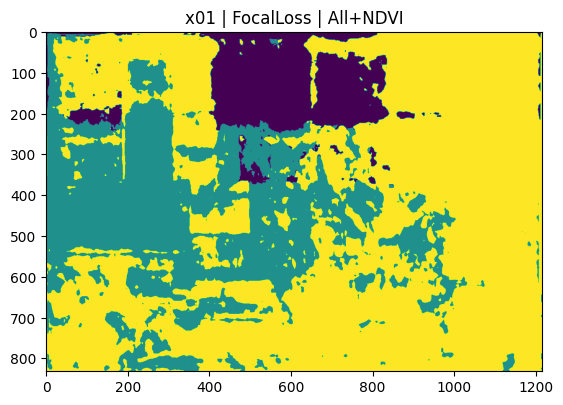

In [51]:
print(np.unique(pred))
plt.imshow(pred)
plt.title('x01 | FocalLoss | All+NDVI')

[1 2 3]


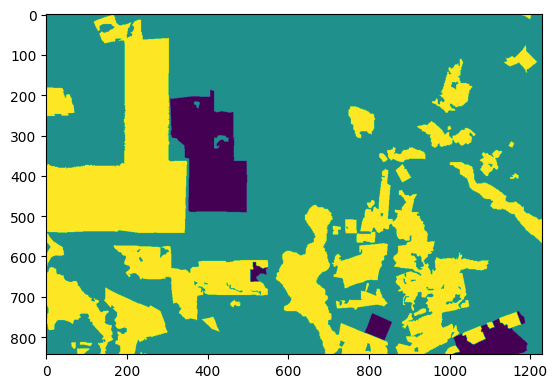

In [53]:
truth_x01 = np.load('./data/truth_masks/truth_x01.npy')
print(np.unique(truth_x01))
plt.imshow(truth_x01)